In [2]:
import requests
import urllib.request
import time
import string
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline  

pd.set_option('display.max_rows', None)

In [2]:
# Tous les thés peuvent être trouvés sur ces 2 pages de produits (90 produits/page)
url_page_1 = 'https://camellia-sinensis.com/fr/thes/?types=nature&formats=vrac&name=asc&page_size=90&page=1'
url_page_2 = 'https://camellia-sinensis.com/fr/thes/?types=nature&formats=vrac&name=asc&page_size=90&page=2'

In [3]:
# On recupère les éléments html de la page grâce à Beautifulsoup
response1 = requests.get(url_page_1)
response2 = requests.get(url_page_2)

soup1 = BeautifulSoup(response1.text, 'html.parser')
soup2 = BeautifulSoup(response2.text, 'html.parser')

In [4]:
#On construit la liste d'adresses URL en scrapant chaque lien de produit sur les 2 pages
list_url = []
for a in soup1.find_all('a', class_= 'm-product-tile__link m-product-tile__link--image'):
    list_url.append(a['href'])
for a in soup2.find_all('a', class_= 'm-product-tile__link m-product-tile__link--image'):
    list_url.append(a['href'])

In [5]:
len(list_url)

145

In [6]:
liste = []
i=0
while i < len(list_url):
    liste.append(list_url[i])
    i+=1

longueur = len(liste)
print(longueur)

145


In [7]:
#Cette fonction va nous servir à "lire" chaque page produit pour récupérer les infos voulues
def getAndParseURL(url):
    result = requests.get(url)
    soup = BeautifulSoup(result.text, 'html.parser')
    return(soup)

In [8]:
#On souhaite garder uniquement le thé en vrac dans notre liste. Pour cela, on récupère les indices de la liste contenant le mo boîte ou sac

k = 0
index = []
while k < len(liste):
    if 'boite' in liste[k]:
        index.append(k)
    if 'sac' in liste[k]:
        index.append(k)
    k+=1
print(index)
print(longueur)
        

[5, 6, 7, 12, 17, 26, 27, 55, 56, 57, 58, 60, 61, 62, 63, 64, 67, 78, 79, 80, 82, 105, 121, 137, 138, 139, 143]
145


In [9]:
# Une fois les indices connus, on supprime ces éléments de notre liste d'adresses en commençant par les indices les plus hauts.
# Ceci afin de ne pas décaler nos éléments.

l = 1
while l <len(index)+1:
    ind = index[-l]
    print(l)
    print(ind)
    del(liste[ind])
    l+=1

1
143
2
139
3
138
4
137
5
121
6
105
7
82
8
80
9
79
10
78
11
67
12
64
13
63
14
62
15
61
16
60
17
58
18
57
19
56
20
55
21
27
22
26
23
17
24
12
25
7
26
6
27
5


In [10]:
#Cette fonction récupère les infos du profil aromatique et garde uniquement les 6 caractéristiques voulues.
def profil(resultat):
    aromas = []
    aroma_str = str(resultat)

    aroma_list = aroma_str.splitlines()
#    print(len(aroma_list))
#    print(aroma_list)
    del aroma_list[0], aroma_list[-1]

    aromas = aroma_list

    j=0
    while j < 6:
#        print(aromas[j])
        aromas[j] = aromas[j][-9]
        j+=1
#    print(len(aroma_list))
    return aromas


In [11]:
# Informations générales
nom = []
variete = []
pays = []
temperature = []

# Profil d'arômes

floral = []
fruite = []
boise = []
terreux = []
epice = []
vegetal = []

# Liste vide pour comparer
vide = []

In [12]:
# En passant par toutes les adresses URL, on récupère les informations de chaque thé

i = 0
aRemplir = 'A remplir'

for url in liste:
    soup = getAndParseURL(url)
    
    # Noms du thé
    nom.append(soup.find('h1', class_= 'product-details__name').string)
    
    #Pays et type de thé
    
    # Récupère le pays et la variété ("couleur") du thé si disponible.
    genre = soup.find_all('span', class_= 'colored-label')
    if len(genre) < 2:
        variete.append(aRemplir)
        pays.append(aRemplir)
        print('OOO Ajouter manuellement les infos de ce thé OOO')
    else:
        variete.append(genre[0].string)
        pays.append(genre[1].string)
    #Récupère la température d'infusion
    prep = soup.find_all('span', class_= 'product-prep__content-row-value')
    if len(prep)>0:
        temperature.append(prep[1].string)
    elif len(prep)==0:
            temperature.append(aRemplir)
    # Récupère le profil aromatique du thé
    aroms = soup.find_all('div', class_= 'product-attributes__aroma-wrapper')
    if aroms != vide:
        aroma = profil(aroms)
        floral.append(aroma[0])
        fruite.append(aroma[1])
        boise.append(aroma[2])
        terreux.append(aroma[3])
        epice.append(aroma[4])
        vegetal.append(aroma[5])
    else:
        floral.append(aRemplir)
        fruite.append(aRemplir)
        boise.append(aRemplir)
        terreux.append(aRemplir)
        epice.append(aRemplir)
        vegetal.append(aRemplir)        
    print(nom[i], variete[i], pays[i], temperature[i], floral[i], fruite[i], boise[i], terreux[i], epice[i], vegetal[i])
    i+=1
    # Ce délai permet de ne pas surcharger le serveur et de ne pas être bloqué.
    time.sleep(1)

Ali Shan 1999 (Cuisson charbon) Thé wulong Taiwan 
                                                                    95
                                                             0 0 3 1 1 0
Anxi Tie Guan Yin Thé wulong Chine 
                                                                    95
                                                             3 0 1 0 0 2
Assam Banaspaty biologique & équitable Thé noir Inde 
                                                                    95
                                                             0 1 2 0 0 0
Bai Hao Thé wulong Taiwan 
                                                                    90
                                                             1 1 3 0 1 0
Bai Hao 2008 Thé wulong Taiwan 
                                                                    95
                                                             0 2 2 0 1 0
Bai Hao Jingmai biologique Thé wulong Chine 
                                   

Kamairicha biologique Thé vert Japon 
                                                                    80
                                                             1 0 1 0 0 3
Kenya Kangaita Thé noir Kenya 
                                                                    95
                                                             1 1 2 0 0 0
Kukicha biologique Thé vert Japon 
                                                                    80
                                                             0 1 2 0 0 2
La Cumbre Bitaco biologique Thé noir Colombie 
                                                                    95
                                                             0 1 3 0 1 0
Laos Pu Er Sheng 2018 Phong Sali Thé pu er et vieilli Laos 
                                                                    95
                                                             1 2 1 0 0 2
Lapsang Souchong biologique Thé noir Chine 
                         

Pu Er Shou 2006 Macao Scenary Thé pu er et vieilli Chine 
                                                                    95
                                                             0 2 1 3 0 0
Pu Er Shou 2008 Jingmai biologique Thé pu er et vieilli Chine 
                                                                    95
                                                             0 1 2 3 0 0
Pu Er Shou 2008 Yellow Label 7572 Thé pu er et vieilli Chine A remplir 0 1 0 3 1 0
Pu Er Shou 2011 Bulang Shan mini tuocha Thé pu er et vieilli Chine 
                                                                    95
                                                             0 1 1 3 0 0
Pu Er Shou 2011 Menghai Sheng Tai Tuo Cha Thé pu er et vieilli Chine 
                                                                    95
                                                             0 0 2 3 0 0
Pu Er Shou 2018 Yongde Thé pu er et vieilli Chine 
                               

In [13]:
#Vérification de la longueur de chaque liste
print(len(nom))
print(len(variete))
print(len(pays))
print(len(temperature))
print(len(floral))
print(len(fruite))
print(len(boise))
print(len(terreux))
print(len(epice))
print(len(vegetal))
print(len(liste))

118
118
118
118
118
118
118
118
118
118
118


In [53]:
#Crée le dataframe pandas avec les listes
df = pd.DataFrame({'nom' : nom, 'variete' : variete, 'pays' : pays, 'temperature' : temperature, 'floral' : floral, 'fruite':fruite, 'boise':boise, 'terreux':terreux, 'epice':epice, 'vegetal':vegetal, 'url':liste})


In [54]:

cols = list(df.columns.values)
print(cols)

['boise', 'epice', 'floral', 'fruite', 'nom', 'pays', 'temperature', 'terreux', 'url', 'variete', 'vegetal']


In [55]:
#On retire les espaces superflus de la valeur "temperature"
df['temperature']= df['temperature'].str.strip()

In [56]:
# On sauve le dataframe dans un fichier csv
export_csv = df.to_csv(r'df.csv', index=None, header=True)

In [57]:
# Pour réouvrir le fichier csv dans un dataframe
#df =  pd.read_csv('scraped_data.csv', encoding='latin-1')


In [58]:
# Il faut maintenant vérifier que les données soient complètes
# Si non, remplir les valeurs manquantes
np.where(df['variete']=='A remplir')

(array([], dtype=int64),)

In [59]:
# On cherche les thés dont le profil d'arôme n'est pas connu
arome_vide = np.where(df['floral']=='A remplir')
arome_vide[0][1]

84

In [60]:
df.loc[arome_vide[0][0]]['url']

'https://camellia-sinensis.com/fr/matcha-sora/2311'

In [61]:
#En comparant la description du matcha sora avec les trois autres matcha, j'ai décidé du profil d'arome suivant : 0 0 0 0 0 3
#La description ne parle que du côté végétal contrairement aux autres thés.
df.loc[arome_vide[0][0]]['floral']=0
df.loc[arome_vide[0][0]]['fruite']=0
df.loc[arome_vide[0][0]]['boise']=0
df.loc[arome_vide[0][0]]['terreux']=0
df.loc[arome_vide[0][0]]['epice']=0
df.loc[arome_vide[0][0]]['vegetal']=3

In [62]:
df.loc[arome_vide[0][1]]['url']

'https://camellia-sinensis.com/fr/pu-er-sheng-2019-yongde-da-shan-vieux-theiers/5824'

In [63]:
#Pour le pu er yongde da shan, vieux théiers, j'ai décidé de ne pas le garder dans la liste. Beaucoups de pu er sont déjà présents
#et je ne m'y connais pas assez dans ce type de thé pour extrapoler les profils des autres pu ers.
df = df.drop([arome_vide[0][1]], axis=0)

In [64]:
np.where(df['floral']=='A remplir')

(array([], dtype=int64),)

In [65]:
temp_vide = df[df['temperature']=='A remplir'].index.tolist()

In [66]:
temp_vide[0]

83

In [67]:
df.at[temp_vide[2],'temperature']

'A remplir'

In [68]:
#Tous les thés Pu Er semblent être infusés à 95 degrés C.
df.at[temp_vide[0],'temperature'] = 95
df.at[temp_vide[1],'temperature'] = 95
df.at[temp_vide[2],'temperature'] = 95

In [69]:
#On veut maintenant changer le type de nos variables 
df.dtypes

boise          object
epice          object
floral         object
fruite         object
nom            object
pays           object
temperature    object
terreux        object
url            object
variete        object
vegetal        object
dtype: object

In [70]:
#La température et les arômes sont des integer
df.temperature = df.temperature.astype(np.int64)
df.floral = df.floral.apply(np.int64)
df.fruite = df.fruite.apply(np.int64)
df.boise = df.boise.apply(np.int64)
df.terreux = df.terreux.apply(np.int64)
df.epice = df.epice.apply(np.int64)
df.vegetal = df.vegetal.apply(np.int64)


In [71]:
df = df[['nom', 'variete', 'pays', 'temperature', 'floral', 'fruite', 'boise', 'terreux', 'epice', 'vegetal', 'url']]

In [72]:
# On exporte le dataframe nettoyé
export_csv = df.to_csv(r'cleaned_data.csv', index=None, header=True)

In [73]:
df

,nom,variete,pays,temperature,floral,fruite,boise,terreux,epice,vegetal,url
0,Ali Shan 1999 (Cuisson charbon),Thé wulong,Taiwan,95,0,0,3,1,1,0,https://camellia-sinensis.com/fr/ali-shan-1999...
1,Anxi Tie Guan Yin,Thé wulong,Chine,95,3,0,1,0,0,2,https://camellia-sinensis.com/fr/anxi-tie-guan...
2,Assam Banaspaty biologique & équitable,Thé noir,Inde,95,0,1,2,0,0,0,https://camellia-sinensis.com/fr/assam-banaspa...
3,Bai Hao,Thé wulong,Taiwan,90,1,1,3,0,1,0,https://camellia-sinensis.com/fr/bai-hao/2779
4,Bai Hao 2008,Thé wulong,Taiwan,95,0,2,2,0,1,0,https://camellia-sinensis.com/fr/bai-hao-2008/...
5,Bai Hao Jingmai biologique,Thé wulong,Chine,95,0,3,2,0,0,0,https://camellia-sinensis.com/fr/bai-hao-jingm...
6,Bai Hao Yin Zhen,Thé blanc,Chine,75,1,0,1,0,0,1,https://camellia-sinensis.com/fr/bai-hao-yin-z...
7,Bai Mu Dan Wang,Thé blanc,Chine,75,1,0,1,0,0,2,https://camellia-sinensis.com/fr/bai-mu-dan-wa...
8,Bancha Shizuoka,Thé vert,Japon,85,0,0,1,0,0,3,https://camellia-sinensis.com/fr/bancha-shizuo...
9,Ceylan New Vithanakande,Thé noir,Sri Lanka,95,0,1,3,0,0,0,https://camellia-sinensis.com/fr/ceylan-new-vi...


In [3]:
#On importe les données dans un nouveau dataframe pour l'analyse
data =  pd.read_csv('cleaned_data.csv',  encoding='latin-1')

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [5]:
#Importation des algorithmes dont nous aurons besoin pour classifier les thés
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

In [6]:
#Nous allons grouper les différents thés par rapport à leur profil d'arôme
pro = data[['floral', 'fruite', 'boise', 'terreux', 'epice', 'vegetal']]

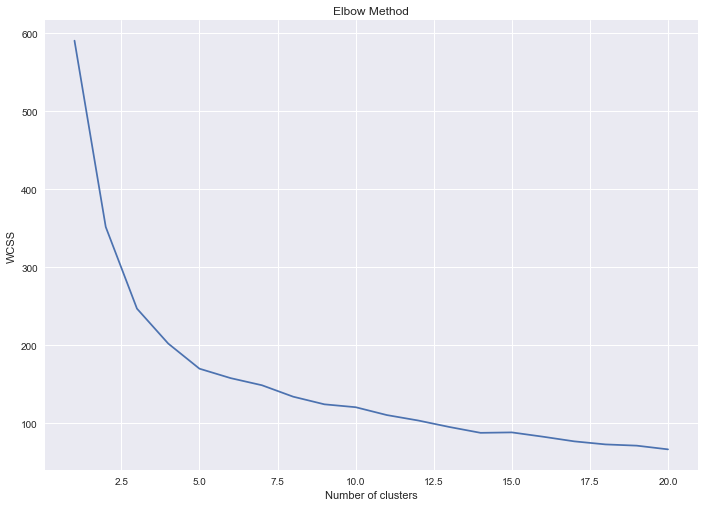

In [7]:
#En regardant les données, on peut savoir en combien de clusters l'ensemble se divise le mieux.
#Pour cela, on utilise la méthode du coude (elbow method) ou le nombre optimal de clusters se situe à l'endroit ou l'inertie 
# selon le nombre de groupe forme un coude.
wcss = []

for i in range(1,21):
    kmeans = KMeans( n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pro)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
#5 clusters

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pro)

#6 clusters
kmeans6 = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y6 = kmeans6.fit_predict(pro)

#Spectral clustering
spectre = SpectralClustering(n_clusters=5, n_init=10)
pred_y_spectr = spectre.fit_predict(pro)

In [9]:
# On rajoute a nos données les groupements faits
data['cluster'] = pred_y 
data['cluster6'] = pred_y6 
data['spectral'] = pred_y_spectr

In [10]:
data

,nom,variete,pays,temperature,floral,fruite,boise,terreux,epice,vegetal,url,cluster,cluster6,spectral
0,Ali Shan 1999 (Cuisson charbon),Thé wulong,Taiwan,95,0,0,3,1,1,0,https://camellia-sinensis.com/fr/ali-shan-1999...,1,4,2
1,Anxi Tie Guan Yin,Thé wulong,Chine,95,3,0,1,0,0,2,https://camellia-sinensis.com/fr/anxi-tie-guan...,3,1,2
2,Assam Banaspaty biologique & équitable,Thé noir,Inde,95,0,1,2,0,0,0,https://camellia-sinensis.com/fr/assam-banaspa...,1,3,0
3,Bai Hao,Thé wulong,Taiwan,90,1,1,3,0,1,0,https://camellia-sinensis.com/fr/bai-hao/2779,1,4,2
4,Bai Hao 2008,Thé wulong,Taiwan,95,0,2,2,0,1,0,https://camellia-sinensis.com/fr/bai-hao-2008/...,4,3,0
5,Bai Hao Jingmai biologique,Thé wulong,Chine,95,0,3,2,0,0,0,https://camellia-sinensis.com/fr/bai-hao-jingm...,4,3,2
6,Bai Hao Yin Zhen,Thé blanc,Chine,75,1,0,1,0,0,1,https://camellia-sinensis.com/fr/bai-hao-yin-z...,3,1,4
7,Bai Mu Dan Wang,Thé blanc,Chine,75,1,0,1,0,0,2,https://camellia-sinensis.com/fr/bai-mu-dan-wa...,3,1,4
8,Bancha Shizuoka,Thé vert,Japon,85,0,0,1,0,0,3,https://camellia-sinensis.com/fr/bancha-shizuo...,0,5,1
9,Ceylan New Vithanakande,Thé noir,Sri Lanka,95,0,1,3,0,0,0,https://camellia-sinensis.com/fr/ceylan-new-vi...,1,4,0


In [11]:
#On classe les thés par appartenance à un cluster. On remarque déjà quelques caractéristiques en lisant le tableau
#Les Puer sont presque tous groupés dans le même cluster et les thés verts japonais dans un autre.

varitest = data[['nom','variete','pays', 'cluster','cluster6','spectral', 'url','floral', 'fruite', 'boise', 'terreux', 'epice', 'vegetal']]
display(varitest.sort_values('cluster'))

,nom,variete,pays,cluster,cluster6,spectral,url,floral,fruite,boise,terreux,epice,vegetal
58,Matcha Fuka Midori,Thé vert,Japon,0,5,1,https://camellia-sinensis.com/fr/matcha-fuka-m...,0,1,0,0,0,3
45,Kamairicha biologique,Thé vert,Japon,0,1,1,https://camellia-sinensis.com/fr/kamairicha-bi...,1,0,1,0,0,3
34,Gyokuro Tamahomare,Thé vert,Japon,0,5,1,https://camellia-sinensis.com/fr/gyokuro-tamah...,0,2,0,0,0,3
33,Gyokuro Shuin,Thé vert,Japon,0,5,1,https://camellia-sinensis.com/fr/gyokuro-shuin...,0,2,0,0,0,3
32,Gyokuro Shizuoka biologique,Thé vert,Japon,0,1,1,https://camellia-sinensis.com/fr/gyokuro-shizu...,1,0,0,0,0,3
31,Gyokuro Okabe,Thé vert,Japon,0,1,1,https://camellia-sinensis.com/fr/gyokuro-okabe...,1,0,0,0,0,3
30,Gunpowder biologique,Thé vert,Chine,0,5,2,https://camellia-sinensis.com/fr/gunpowder-bio...,0,0,1,1,0,3
29,Genmaicha biologique,Thé vert,Japon,0,5,1,https://camellia-sinensis.com/fr/genmaicha-bio...,0,0,1,0,0,2
28,Genmaicha avec Matcha & Sencha biologique,Thé vert,Japon,0,5,2,https://camellia-sinensis.com/fr/genmaicha-ave...,0,0,2,0,0,3
47,Kukicha biologique,Thé vert,Japon,0,5,2,https://camellia-sinensis.com/fr/kukicha-biolo...,0,1,2,0,0,2


In [12]:
# Les couleurs choisies pour les thés sont celles du site internet.
color = ["#63CABA", "#886479", "#A5BACA", "#ABC37D", "#005970", "#D6223D"]

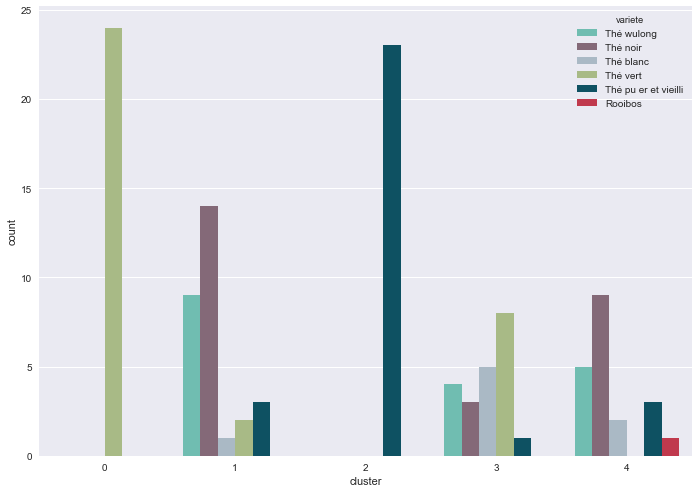

In [13]:
#On trace le nombre de thés de chaque variété pour chaque cluster
ax = sns.countplot(x="cluster", hue='variete', data=varitest, palette = color)

In [14]:
#On voit bien que les clusters 0 et 2 (peuvent changer lorsque l'on relance le code) sont composés uniquement d'un seul type de thé (puer et thé vert)
#Les thés blancs sont surtout regroupés dans le cluster 3 et les wulong dans le 1 mais c'est moins flagrant.

In [15]:
#Afin de voir s'il existe une explication pour les autres clusters, j'ai décidé d'analyser l'intensité des arômes présents dans un cluster.
#Pour cela, on somme la valeur de chaque arôme pour un cluster donné et on divise par le nombre de thés présents dans le cluster.

#Intensité des arômes pour chaque cluster
floral0 = varitest.query("cluster == 0")['floral'].sum()
fruite0 = varitest.query("cluster == 0")['fruite'].sum()
boise0 = varitest.query("cluster == 0")['boise'].sum()
terreux0 = varitest.query("cluster == 0")['terreux'].sum()
epice0 = varitest.query("cluster == 0")['epice'].sum()
vegetal0 = varitest.query("cluster == 0")['vegetal'].sum()

n_cluster0 = len(varitest[varitest['cluster']==1])

print(n_cluster0)



29


In [16]:
#Afin de voir s'il existe une explication pour les autres clusters, j'ai décidé d'analyser l'intensité des arômes présents dans un cluster.
#Pour cela, on somme la valeur de chaque arôme pour un cluster donné et on divise par le nombre de thés présents dans le cluster.

#Initialisation des listes
arom_flora =  []
arom_fruit =  []
arom_bois =  []
arom_terre =  []
arom_epice =  []
arom_vege =  []

#Pour chaque cluster, on fais la moyenne des valeurs d'arômes des thés.
i = 0
while i<5:
    arom_flora.append(varitest[varitest['cluster']==i]['floral'].sum()/len(varitest[varitest['cluster']==i]))
    arom_fruit.append(varitest[varitest['cluster']==i]['fruite'].sum()/len(varitest[varitest['cluster']==i]))
    arom_bois.append(varitest[varitest['cluster']==i]['boise'].sum()/len(varitest[varitest['cluster']==i]))
    arom_terre.append(varitest[varitest['cluster']==i]['terreux'].sum()/len(varitest[varitest['cluster']==i]))
    arom_epice.append(varitest[varitest['cluster']==i]['epice'].sum()/len(varitest[varitest['cluster']==i]))
    arom_vege.append(varitest[varitest['cluster']==i]['vegetal'].sum()/len(varitest[varitest['cluster']==i]))
    i+=1



In [17]:
arom_cluster = [1,2,3,4,5]
clusters = [0,1,2,3,4]
i=0
while i<5:
    arom_cluster[i] = [arom_flora[i], arom_fruit[i], arom_bois[i],arom_terre[i], arom_epice[i], arom_vege[i]]
#    arom_cluster.append(arom_flora[i], arom_fruit[i])
    i+=1


In [18]:
dicts = {}
keys = range(5)
for i in keys:
    dicts[i] = arom_cluster[i]

In [19]:
aromas = pd.DataFrame(dicts)

In [20]:
aromasT=aromas.transpose()
aromasT.columns = ['floral','fruite','boise','terreux','epice','vegetal']
aromasT

,floral,fruite,boise,terreux,epice,vegetal
0,0.250000,0.583333,0.541667,0.041667,0.000000,2.875000
1,0.275862,0.689655,2.586207,0.275862,0.413793,0.206897
2,0.000000,0.869565,1.304348,2.652174,0.304348,0.086957
3,1.666667,0.714286,0.571429,0.000000,0.000000,1.952381
4,0.550000,2.250000,1.450000,0.300000,0.200000,0.300000


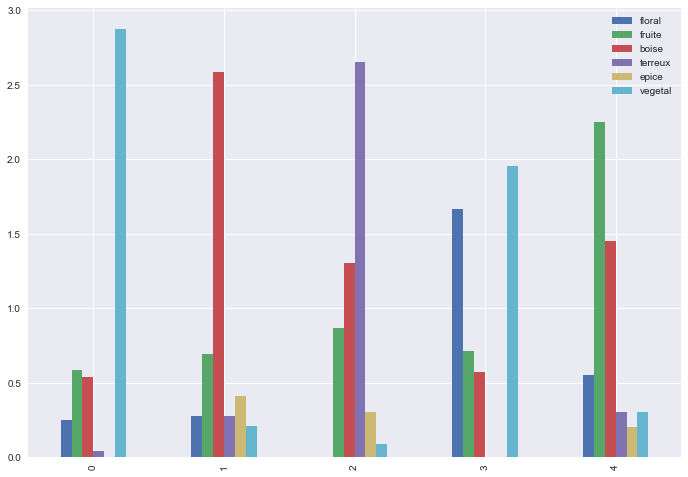

In [21]:
aromasT.plot(kind='bar')

In [23]:
input_the = 'Darjeeling Avongrove biologique'

In [24]:
#dSquared = scipy.spatial.distance.cdist(data.iloc[:,4:10], temp_df.iloc[:,4:10], metric='euclidean')

In [25]:
#list_dist = dSquared.tolist()
#sorted(list_dist)

In [26]:
#data.iloc[:,4:10]
#temp_df.iloc[:,4:10]

In [27]:
#data.loc[data['nom']==input_the]
#cluster_the = data.loc[data['cluster']==]
#temp_df = data.loc[data['nom']==input_the]
#cluster_the = temp_df.cluster.values[0]
#new_df = data.loc[data['cluster']==cluster_the].copy()
#new_df
#distance_sameC = scipy.spatial.distance.cdist(new_df.iloc[:,4:10], temp_df.iloc[:,4:10], metric='euclidean')
#dist_clust = distance_sameC.tolist()
#new_df['distance'] = dist_clust
#new_df.sort_values(['distance'])[1:6]


In [28]:
#input_string = 'Darjeeling Avongrove biologique'
#input_tea = data.loc[data['nom']==input_string]
# Isole tous les thés du même cluster    
#cluster_the = input_tea.cluster.values[0]

#variete_the = input_tea.variete.values[0]

#new_df = data.loc[data['cluster']==cluster_the].copy()

#new_df = new_df[new_df['nom'] != input_string].copy()


# Calcule la distance euclidienne entre tous les thés du cluster et le thé connu
#distance_sameC = scipy.spatial.distance.cdist(new_df.iloc[:,4:10], input_tea.iloc[:,4:10], metric='euclidean')
#dist_clust = distance_sameC.tolist()

#new_df['distance'] = dist_clust

#same_type = new_df[new_df['variete'] == variete_the].copy()
#different_type = new_df[new_df['variete'] != variete_the].copy()
#same_type = new_df[new_df['variete'] == input_tea['variete']].copy()
#print(same_type)
#print(different_type)
#result = same_type.sort_values(['distance'])[0:3].copy()
#result_diff  = 
#result = result.append(different_type.sort_values(['distance'])[0:2].copy())
#resultat = result[['nom','variete','pays', 'distance']]
#resultat
#resultat

In [37]:
def recommendTea(input_string):
# Récupère les infos du thé connu
    input_tea = data.loc[data['nom']==input_string]
    variete_the = input_tea.variete.values[0]
# Isole tous les thés du même cluster    
    cluster_the = input_tea.cluster.values[0]
    new_df = data.loc[data['cluster']==cluster_the].copy()
    new_df = new_df[new_df['nom'] != input_string].copy()
    
# Calcule la distance euclidienne entre tous les thés du cluster et le thé connu
    distance_sameC = scipy.spatial.distance.cdist(new_df.iloc[:,4:10], input_tea.iloc[:,4:10], metric='euclidean')
    dist_clust = distance_sameC.tolist()
    new_df['distance'] = dist_clust
    
# Crée 2 dataframe pour séparer les thés s'ils sont de la même variété que le thé connu ou non
    same_type = new_df[new_df['variete'] == variete_the].copy()
    different_type = new_df[new_df['variete'] != variete_the].copy()

# Recommande 3 thés de la même variété dans le même cluster (si possible)
    resultat1 = same_type.sort_values(['distance'])[0:3].copy()
# Recommande 2 thés du même cluster mais de variété différentes (si possible)
    resultat1 = resultat1.append(different_type.sort_values(['distance'])[0:2].copy())


    resultat = resultat1[['nom','variete','pays', 'distance']]
    print('Les thés recommandés pour vous sont : ')
    return  resultat
    
    

In [38]:
recommendTea(input_the)

Les thés recommandés pour vous sont : 


,nom,variete,pays,distance
46,Kenya Kangaita,Thé noir,Kenya,[1.0]
72,Pu Er Sheng 1996 Menghai,Thé pu er et vieilli,Chine,[1.0]


In [39]:
rooibos = 'Rooibos Wupperthal biologique'
recommendTea(rooibos)

Les thés recommandés pour vous sont : 


,nom,variete,pays,distance
42,Jin Hou biologique,Thé noir,Chine,[1.0]
83,Pu Er Sheng 2016 Mengsong,Thé pu er et vieilli,Chine,[1.0]


In [40]:
ceylan = 'Ceylan New Vithanakande'
recommendTea(ceylan)

Les thés recommandés pour vous sont : 


,nom,variete,pays,distance
36,Hong Xiang Luo,Thé noir,Chine,[0.0]
97,Rwanda Rukeri biologique,Thé noir,Rwanda,[0.0]
2,Assam Banaspaty biologique & équitable,Thé noir,Inde,[1.0]
10,Da Hong Pao 1994,Thé wulong,Chine,[0.0]
104,Shui Xian Lao Cong,Thé wulong,Chine,[0.0]
